In [33]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as linalg
import pandas as pd
from pandas import DataFrame
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import r2_score

In [4]:
#Import deseasonalized and detrended data from Data Assignment 1
Spreadsheet = pd.read_csv('/Users/farha/Downloads/545_ts_data.csv')
Data = Spreadsheet.to_numpy()
data = np.zeros(310)
for i in range (0,len(data)):
    data [i] = Data[i][0]

In [5]:
#Testing and training data split
train = np.zeros(276)
test = np.zeros(34)
for i in range (0,len(data)):
    if (i <= 275):
        train[i] = data [i]
    if (i >= 276):
        test [i-276] = data [i]

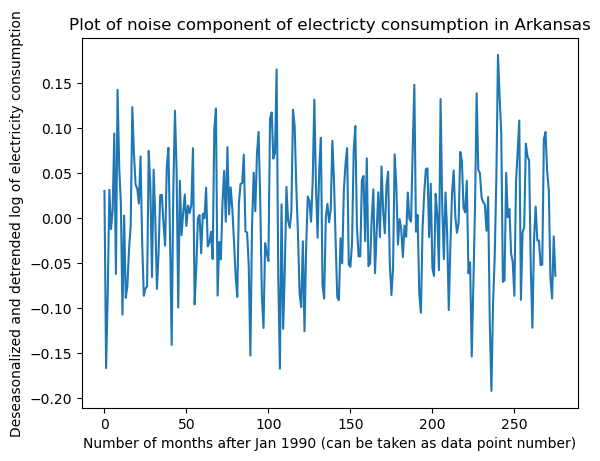

In [11]:
x = np.arange(0,len(train))
plt.plot(x,train)
plt.xlabel("Number of months after Jan 1990 (can be taken as data point number)")
plt.ylabel("Deseasonalized and detrended log of electricity consumption")
plt.title("Plot of ""noise"" component of electricty consumption in Arkansas")
plt.savefig('Task 1 plot of original training noise.png', bbox_inches='tight')

Text(0.5, 1.0, 'Plot of Autocorrelation function')

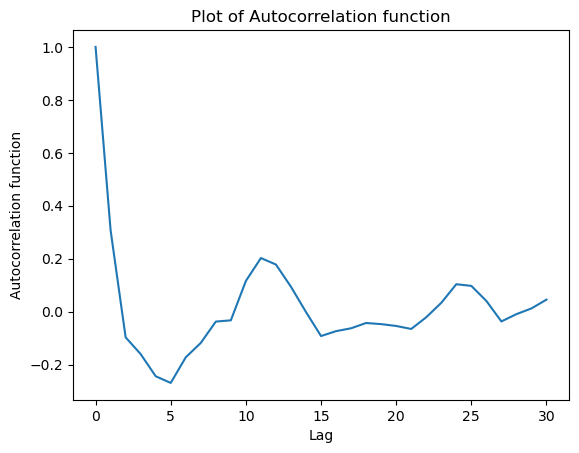

In [12]:
acorr = sm.tsa.acf(train, nlags = 30)
x = np.arange(0,len(acorr))
plt.plot(x,acorr)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation function")
plt.title("Plot of Autocorrelation function")
#plt.savefig('Task 2 Autocorrelation Plain.png', bbox_inches='tight')

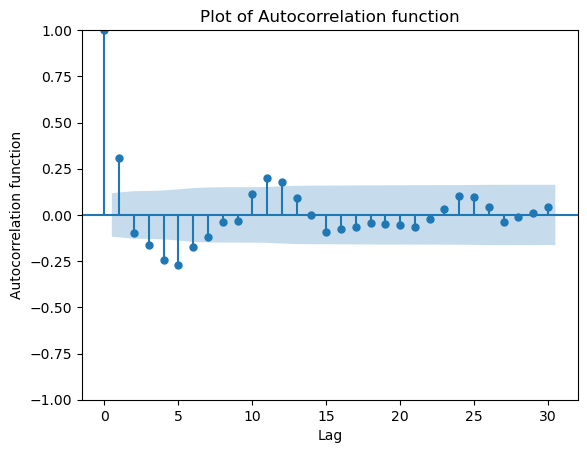

In [13]:
#Task 2: Plot autocorrelation function
sm.graphics.tsa.plot_acf(train.squeeze(), lags=30)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation function")
plt.title("Plot of Autocorrelation function")
plt.savefig('Task 2 Autocorrelation with Band.png', bbox_inches='tight')
#Choose q = 12 if modelling with just MA(q)

In [14]:
#Task 2: Fit a pure MA
MA_model = ARIMA(train, order = (0,0,12))
MA = MA_model.fit()
print(MA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  276
Model:                ARIMA(0, 0, 12)   Log Likelihood                 428.061
Date:                Mon, 24 Apr 2023   AIC                           -828.122
Time:                        15:35:44   BIC                           -777.437
Sample:                             0   HQIC                          -807.783
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.972e-05      0.000     -0.098      0.922      -0.001       0.001
ma.L1          0.1102      0.071      1.560      0.119      -0.028       0.249
ma.L2         -0.4472      0.069     -6.506      0.0

C:\Users\farha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\farha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


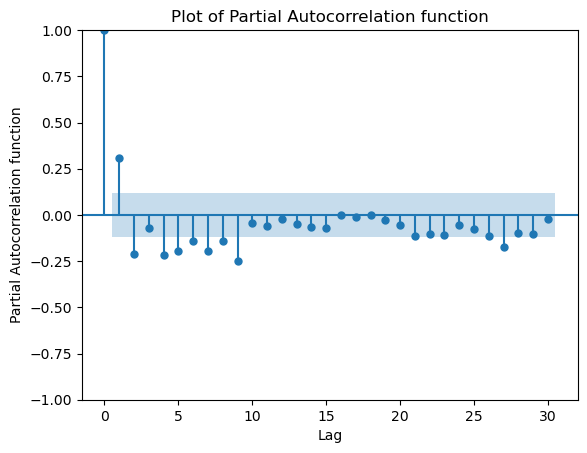

In [15]:
#Task 3: Purely AR process, PACF plot
sm.graphics.tsa.plot_pacf(train.squeeze(), lags=30)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation function")
plt.title("Plot of Partial Autocorrelation function")
plt.savefig('Task 3 Partial Autocorrelation with Band.png', bbox_inches='tight')
#choose p = 9

In [16]:
AR_model = ARIMA(train, order = (9,0,0))
AR = AR_model.fit()
print(AR.summary())
AR.aic

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  276
Model:                 ARIMA(9, 0, 0)   Log Likelihood                 415.634
Date:                Mon, 24 Apr 2023   AIC                           -809.268
Time:                        15:35:48   BIC                           -769.443
Sample:                             0   HQIC                          -793.287
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.001     -0.083      0.934      -0.003       0.002
ar.L1          0.1790      0.059      3.048      0.002       0.064       0.294
ar.L2         -0.3299      0.066     -5.003      0.0

-809.2678974248704

In [36]:
#Task 4 - find best values for p and q in ARMA(p,q) model
P_max = 10
AIC_small = ARIMA(train, order = (1,0,1)).fit().aic
param = []
for i in range (1, P_max):
    for j in range(1, P_max - i + 1):
        ARMA_model = ARIMA(train, order = (i,0,j))
        ARMA = ARMA_model.fit()
        AIC = ARMA.aic
        if (AIC < AIC_small):
            AIC_small = AIC
            best_param = [i,j]
            bestARMA = ARMA
print("The best values for p and q, respectively, are ", best_param, "with AIC value", AIC_small)
print(bestARMA.summary())
#The best values for p and q (when p + q <= 5), respectively, are  [2, 1] with AIC value -825.1284555970576 
#The best values for p and q (when p + q <= 10), respectively, are  [3, 4] with AIC value -832.9589544630007

C:\Users\farha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\farha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\farha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\farha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\farha\anaconda3\lib\site-packages\statsmodels\base\model

C:\Users\farha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\farha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The best values for p and q, respectively, are  [3, 4] with AIC value -832.9589544630007
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  276
Model:                 ARIMA(3, 0, 4)   Log Likelihood                 425.479
Date:                Mon, 24 Apr 2023   AIC                           -832.959
Time:                        17:29:19   BIC                           -800.375
Sample:                             0   HQIC                          -819.884
                                - 276                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.564e-05   7.46e-05      0.746      0.456   -9.05e-05       0.000
ar.L1          0.4680      0.064      7.33

C:\Users\farha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


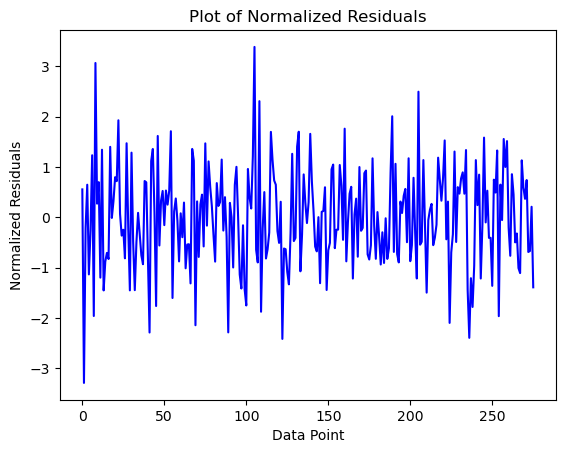

NormaltestResult(statistic=1.5679948577167022, pvalue=0.45657722354652097)

In [22]:
residuals = bestARMA.resid
normalizedresid = residuals/np.std(bestARMA.resid)
plt.plot(normalizedresid,'b')
#plt.plot(residuals,'r')
plt.xlabel("Data Point")
plt.ylabel("Normalized Residuals")
plt.title("Plot of Normalized Residuals")
plt.savefig('Task 5 Plot of Normalized Residuals.png', bbox_inches='tight')
plt.show()
stats.normaltest(residuals)

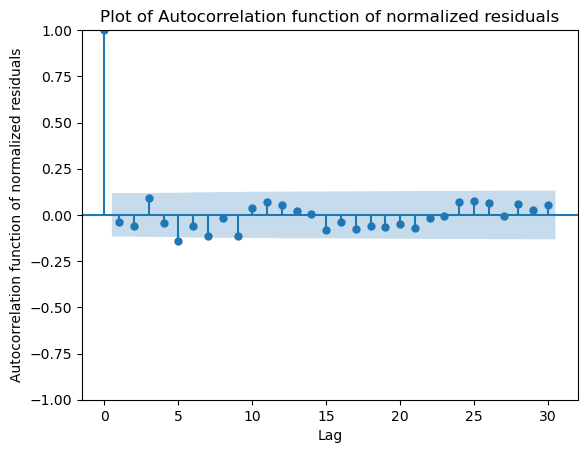

In [23]:
sm.graphics.tsa.plot_acf(normalizedresid.squeeze(), lags=30)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation function of normalized residuals")
plt.title("Plot of Autocorrelation function of normalized residuals")
plt.savefig('Task 5 Plot of Autocorrelation function of normalized residuals.png', bbox_inches='tight')

In [25]:
predictsales = bestARMA.predict(276, 309, dynamic = True)
print(predictsales)
len(predictsales)

[ 1.21172051e-02  4.54486334e-02  4.50310450e-02  2.80934145e-02
  9.29168589e-03 -3.43948280e-03 -8.43698913e-03 -7.75493547e-03
 -4.52025012e-03 -1.22716366e-03  8.70212154e-04  1.59685979e-03
  1.37602211e-03  7.69154368e-04  1.97219604e-04 -1.44775283e-04
 -2.45983150e-04 -1.90583459e-04 -7.84051826e-05  2.01126945e-05
  7.52461543e-05  8.84415361e-05  7.60085592e-05  5.55359822e-05
  3.87039825e-05  2.99299294e-05  2.84000106e-05  3.10183204e-05
  3.47126180e-05  3.75647984e-05  3.89402790e-05  3.90746390e-05
  3.85458005e-05  3.78859307e-05]


34

[14.23056965 14.2645707  14.2648112  14.24852013 14.23035342 14.21824574
 14.21386018 14.21514265 14.21896622 14.22283666 14.22549985 14.22678078
 14.22710269 14.22702704 14.22697478 14.22714094 14.22753634 14.22807682
 14.22866254 14.22922307 14.22972868 14.23018081 14.23059579 14.23099119
 14.2313787  14.23176273 14.23214247 14.23251483 14.23287672 14.23322624
 14.23356276 14.23388649 14.23419803 14.2344979 ]


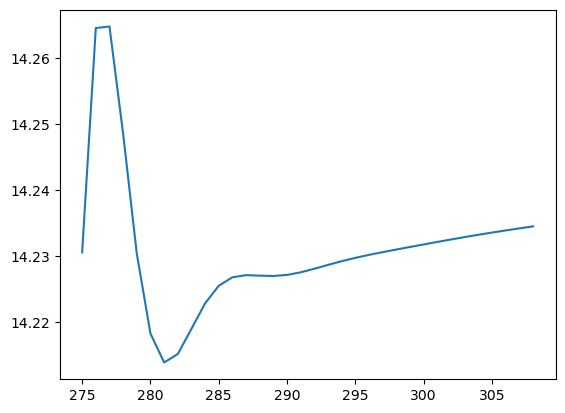

In [26]:
#Task 6: Global polynomial, seaonal adjustment
coeff = [13.5965891712218,0.00384725233262184, -5.76702303170588e-06] #From data assignment 1
x = np.arange (275,309)
y = coeff[0] + coeff[1] * x + coeff[2] * x**2
polyforecast = y + predictsales
plt.plot(x,polyforecast)
seasonadj = [0.155018333394111, 0.0312379694703431, -0.0903585644157126, -0.273127561301950, -0.283420961049568, 0.0174871368486382, 0.300277880771304, 0.356248295210468, 0.236906236570851, -0.119001980526326, -0.284303593319649, -0.0469631916524982]
print(polyforecast)

[14.23056965 14.2645707  14.2648112  14.24852013 14.23035342 14.21824574
 14.21386018 14.21514265 14.21896622 14.22283666 14.22549985 14.22678078
 14.22710269 14.22702704 14.22697478 14.22714094 14.22753634 14.22807682
 14.22866254 14.22922307 14.22972868 14.23018081 14.23059579 14.23099119
 14.2313787  14.23176273 14.23214247 14.23251483 14.23287672 14.23322624
 14.23356276 14.23388649 14.23419803 14.2344979 ]
[14.38558798 14.29580867 14.17445264 13.97539256 13.94693246 14.23573287
 14.51413806 14.57139095 14.45587246 14.10383468 13.94119626 14.17981759
 14.38212103 14.25826501 14.13661622 13.95401337 13.94411538 14.24556395
 14.52894042 14.58547136 14.46663491 14.11117883 13.94629219 14.184028
 14.38639703 14.2630007  14.14178391 13.95938726 13.94945576 14.25071338
 14.53384064 14.59013479 14.47110427 14.11549592]


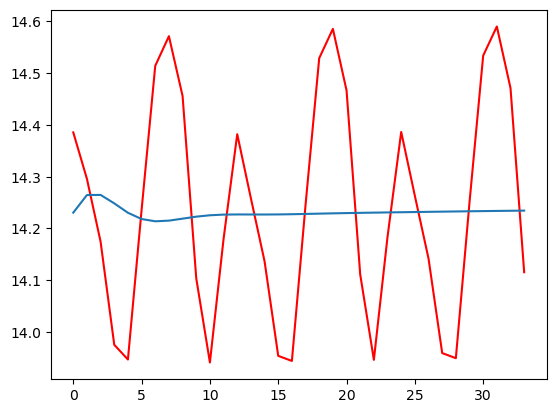

In [27]:
polyseasonforecast = np.zeros(34)
for i in range (0,12):
    #print(i)
    for j in range (0,34):
        if (j%12 == i):
            #print(j)
            polyseasonforecast[j] =  polyforecast[j] + seasonadj[i]
plt.plot(polyseasonforecast, 'r')
plt.plot(polyforecast)
type(polyseasonforecast)
print(polyforecast)
print(polyseasonforecast)    

In [28]:
delogpred = np.exp(polyseasonforecast)
#print(delogpred)
testsales = [1776676.40000000,
1535084.50000000,
1514453,
1267509.20000000,
1110431.90000000,
1443984.50000000,
1856023.70000000,
1847533.80000000,
1770094.50000000,
1346044.50000000,
1116863.70000000,
1634587.30000000,
2001883.10000000,
1931429,
1573645,
1142416.80000000,
1061928.30000000,
1411380.90000000,
1745698.30000000,
1775250.10000000,
1791746.20000000,
1273313.20000000,
1171239.80000000,
1561188.40000000,
1892767.10000000,
1702173.70000000,
1790195.30000000,
1071918.10000000,
1062734.20000000,
1438896.60000000,
1958939.20000000,
2072169.20000000,
1663030.30000000,
1270155.70000000]

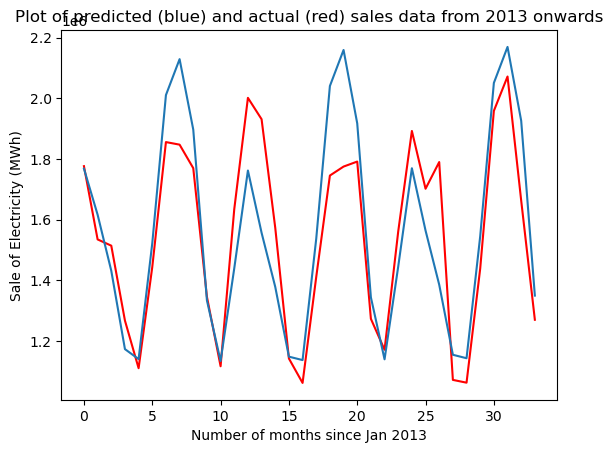

In [29]:
plt.plot(testsales,color = 'r')
plt.plot(delogpred)
plt.xlabel("Number of months since Jan 2013")
plt.ylabel("Sale of Electricity (MWh)")
plt.title("Plot of predicted (blue) and actual (red) sales data from 2013 onwards")
plt.savefig('Task 6 Predicted vs Actual Sales.png', bbox_inches='tight')

In [35]:
MSE = (linalg.norm(testsales - delogpred))**2/len(delogpred)
print("MSE =", MSE)

MSE = 30322101796.225243


0.6730021382658319

In [ ]:
#R^2 calculation
